In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [39]:
%matplotlib inline

In [40]:
from initializations import (
    initialize_agents,
    initialize_beacons
)

from influences import (
    rotation_influence,
    position_influence,
    alignment_influence,
    cohesion_influence
)

from simulations import (
    look_at_beacon,
    move_to_beacon,
    look_with_neighbors,
    move_with_neighbors,
    individual_motion,
    collective_motion,
    motion_simulation
)

from diagnostics import (
    inspect_simulation,
    inspect_rotation_influence,
    inspect_position_influence
)

In [41]:
agent_pos, agent_rot = initialize_agents()
beacon_pos = initialize_beacons()

In [42]:
sim = motion_simulation(timesteps=300)

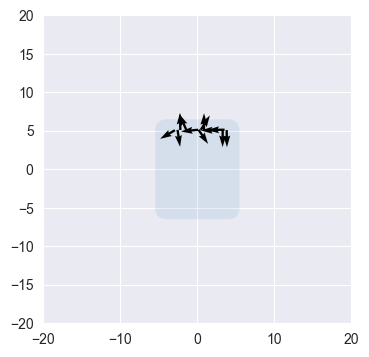

In [43]:
from matplotlib.animation import PillowWriter

a = inspect_simulation(sim)
a.save('./../media/gif/animation.gif', writer=PillowWriter(fps=30))

In [26]:
ext_rotation = rotation_influence(agent_pos[0], agent_rot[0], beacon_pos[0])
ext_rotation

-2.0076038370021574

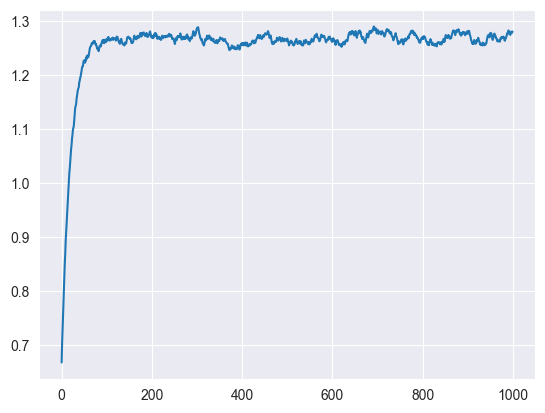

In [27]:
ext_rotation_sim = look_at_beacon(agent_pos[-1], agent_rot[-1], beacon_pos[-1], noise=0.2)
plt.plot(ext_rotation_sim)

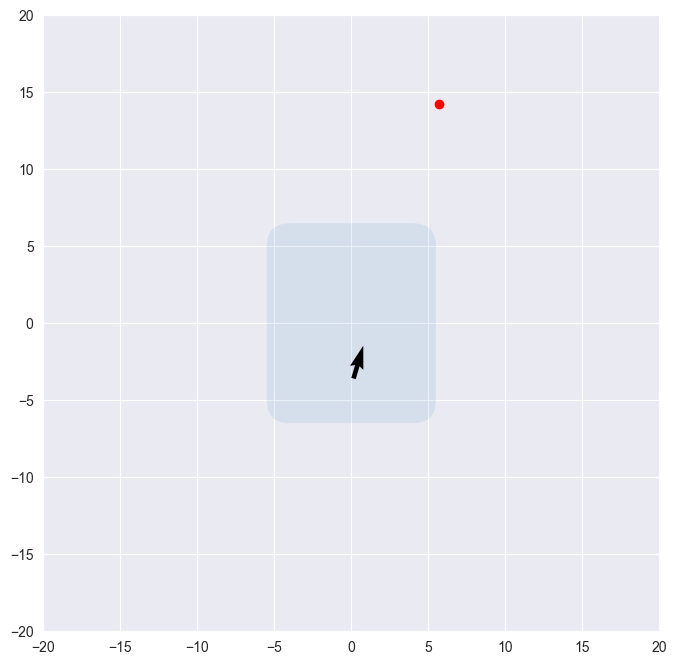

In [28]:
a = inspect_rotation_influence(ext_rotation_sim, agent_pos[-1], beacon_pos[-1])
a.save('./../media/gif/rotation1.gif', writer=PillowWriter(fps=30))

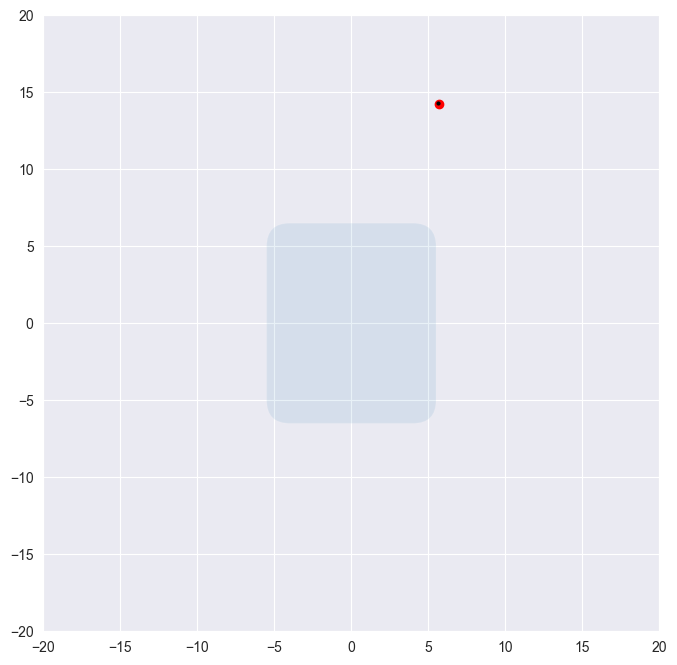

In [36]:
position_sim = move_to_beacon(agent_pos[-1], beacon_pos[-1], noise=0.5)
b = inspect_position_influence(position_sim, beacon_pos[-1])
b.save('./../media/gif/position1.gif', writer=PillowWriter(fps=30))